**有监督学习**：分类和回归   
**无监督学习**：聚类和降维

# 分类

## 逻辑回归（LogisticRegression）
from sklearn.linear_model import LogisticRegression

### 导入需要的库

In [8]:
import numpy as np
import pandas as pd

### 直接从网站导入数据

In [9]:
column_names=['Sample code number','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class']
df=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data',names=column_names)

In [55]:
X=df[column_names[1:10]]#第一列无意义，舍去
y=df[column_names[10]]

### 查看数据的特点

In [26]:
#df.shape
#df.info()
#df.describe()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
600,1336798,3,1,1,1,2,1,2,1,1,2
601,1344449,1,1,1,1,1,1,2,1,1,2
602,1350568,4,1,1,1,2,1,2,1,1,2
603,1352663,5,4,6,8,4,1,8,10,1,4
604,188336,5,3,2,8,5,10,8,1,2,4
605,352431,10,5,10,3,5,8,7,8,3,4
606,353098,4,1,1,2,2,1,1,1,1,2
607,411453,1,1,1,1,2,1,1,1,1,2
608,557583,5,10,10,10,10,10,10,1,1,4
609,636375,5,1,1,1,2,1,1,1,1,2


### 将数据集中的？转换为缺失值NAN

In [27]:
df=df.replace(to_replace='?',value=np.nan)

### 删除缺失值

In [30]:
df.dropna(axis=0,how='any',inplace=True)

In [41]:
df.shape
df.dtypes

Sample code number             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

此时可以看到变量Bare Nuclei为字符型，转换为数值型

In [40]:
df['Bare Nuclei']=df['Bare Nuclei'].astype('int64')

### 划分数据集，训练集和测试集

In [66]:
from sklearn.model_selection import train_test_split#切分数据集

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25, random_state=2019)

查看训练样本的类别分布

In [102]:
print(y.value_counts())
print(y_train.value_counts())
print(y_test.value_counts())

2    444
4    239
Name: Class, dtype: int64
2    332
4    180
Name: Class, dtype: int64
2    112
4     59
Name: Class, dtype: int64


### 训练数据

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

标准化数据

In [67]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


模型，训练，预测  
SGDClassifier是一个用随机梯度下降算法训练的线性分类器的集合。默认情况下是一个线性（软间隔）支持向量机分类器。

In [78]:
lr=LogisticRegression()
sgdc=SGDClassifier()

In [79]:
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [80]:
sgdc.fit(X_train,y_train)
sgdc_predict=sgdc.predict(X_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


输出混淆矩阵，可以计算召回率recall（查全率），准确率accuracy，精确率precise（查准率）

In [103]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [109]:
print('逻辑回归')
print('accuracy:',lr.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,lr_predict))
print(classification_report(y_test,lr_predict,target_names=['良性','恶性']))

逻辑回归
accuracy: 0.9707602339181286
混淆矩阵
[[109   3]
 [  2  57]]
              precision    recall  f1-score   support

          良性       0.98      0.97      0.98       112
          恶性       0.95      0.97      0.96        59

   micro avg       0.97      0.97      0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [110]:
print('随机梯度下降')
print('accuracy:',sgdc.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,sgdc_predict))
print(classification_report(y_test,sgdc_predict,target_names=['良性','恶性']))

随机梯度下降
accuracy: 0.9473684210526315
混淆矩阵
[[105   7]
 [  2  57]]
              precision    recall  f1-score   support

          良性       0.98      0.94      0.96       112
          恶性       0.89      0.97      0.93        59

   micro avg       0.95      0.95      0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



总结：一般样本数量在10万级考虑用随机梯度下降法求解

## 支持向量机（SVC）
from sklearn.svm import LinearSVC

### 导入数据

In [252]:
from sklearn.datasets import load_digits
X,y=load_digits(return_X_y=True)
names=load_digits().target_names.astype(str)#类别，转化为字符型

### 切分数据集

In [258]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

### 训练数据

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [255]:
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [256]:
lsvc=LinearSVC()
lsvc.fit(X_train,y_train)
lsvc_predict=lsvc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### 指标分析

In [167]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [171]:
print('支持向量机')
print('混淆矩阵')
print(confusion_matrix(y_test,lsvc_predict))
print('accuracy',lsvc.score(X_test,y_test))
print(classification_report(y_test,lsvc_predict,target_names=names))

支持向量机
混淆矩阵
[[47  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  1  0  0  0  0]
 [ 0  1 40  0  0  0  0  0  1  0]
 [ 0  0  0 51  0  1  0  0  0  0]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  2  0 46  0  0  0  0]
 [ 0  1  0  0  0  0 46  0  0  0]
 [ 0  1  0  0  1  0  0 40  0  0]
 [ 0  0  1  1  0  1  0  1 41  0]
 [ 0  0  0  1  0  0  0  1  1 43]]
accuracy 0.9622222222222222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        47
           1       0.91      0.98      0.94        41
           2       0.98      0.95      0.96        42
           3       0.93      0.98      0.95        52
           4       0.97      0.97      0.97        40
           5       0.94      0.96      0.95        48
           6       1.00      0.98      0.99        47
           7       0.95      0.95      0.95        42
           8       0.95      0.91      0.93        45
           9       1.00      0.93      0.97        46

   micro avg       0.96      0.96 

## 朴素贝叶斯
from sklearn.naive_bayes import MultinomialNB  
*GaussianNB(高斯朴素贝叶斯)、MultinomialNB(多项式朴素贝叶斯)、BernoulliNB(伯努利朴素贝叶斯)*

### 导入数据

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [4]:
news=fetch_20newsgroups(subset='all')

In [5]:
len(news.data)

18846

### 切分数据集

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(news.data,news.target,test_size=0.25,random_state=2019)

文本转化为特征向量

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

In [26]:
print(X_test[0:1,].shape)

(1, 153467)


### 训练数据

In [8]:
from sklearn.naive_bayes import MultinomialNB#GaussianNB(高斯朴素贝叶斯)、MultinomialNB(多项式朴素贝叶斯)、BernoulliNB(伯努利朴素贝叶斯)

In [9]:
mnb=MultinomialNB()
mnb.fit(X_train,y_train)
mnb_predict=mnb.predict(X_test)

### 指标分析

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [17]:
print('贝叶斯')
print('accuracy',mnb.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,mnb_predict))
print(classification_report(y_test,mnb_predict,target_names=news.target_names))

贝叶斯
accuracy 0.8567487266553481
混淆矩阵
[[193   0   0   0   0   1   0   0   0   0   1   0   0   0   1  17   1   5
    1   3]
 [  0 239   0   4   1   6   0   1   0   1   0   7   3   2   2   1   1   1
    0   0]
 [  0  49  56  62   6  52   1   1   0   0   0   9   2   0   2   1   2   0
    2   0]
 [  0  10   0 217  11   4   3   0   0   0   2   7   5   0   0   0   0   0
    3   0]
 [  0   7   0  12 216   2   2   3   0   0   1   2   6   0   0   0   0   1
    2   0]
 [  0  11   0   3   0 203   1   0   0   0   0   6   1   1   2   0   1   0
    0   0]
 [  0   8   1  16   7   0 169  11   1   2   1   3  13   1   3   2   2   3
    0   0]
 [  0   2   0   1   0   1   1 206   2   0   0   1   1   1   0   0   2   1
    3   0]
 [  0   0   0   1   0   0   2   3 227   0   0   0   2   0   0   1   1   1
    2   0]
 [  0   0   0   0   1   1   0   3   0 233   2   0   0   0   0   0   1   0
    0   0]
 [  0   0   0   0   0   0   0   0   1   3 235   0   0   0   0   1   0   0
    0   0]
 [  0   0   0   0   0   0   

总结：可应用于文本分类，但是在特征关联性较强的分类任务上表现不佳

## k近邻
from sklearn.neighbors import KNeighborsClassifier 

### 导入数据

In [260]:
import pandas as pd
from sklearn.datasets import load_iris
X=load_iris().data
y=load_iris().target

### 切分数据集

In [261]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [13]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

### 训练数据

In [16]:
from sklearn.neighbors import KNeighborsClassifier 
knc=KNeighborsClassifier()
knc.fit(X_train,y_train)
knc_predict=knc.predict(X_test)

### 指标分析

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [24]:
print('k近邻')
print('accuacy:',knc.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,knc_predict))
print(classification_report(y_test,knc_predict,target_names=load_iris().target_names))

k近邻
accuacy: 0.9473684210526315
混淆矩阵
[[16  0  0]
 [ 0  5  2]
 [ 0  0 15]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.71      0.83         7
   virginica       0.88      1.00      0.94        15

   micro avg       0.95      0.95      0.95        38
   macro avg       0.96      0.90      0.92        38
weighted avg       0.95      0.95      0.94        38



k近邻与其他模型区别较大的一点是，其没有参数的估计过程

## 决策树
from sklearn.tree import DecisionTreeClassifier

### 导入数据

In [2]:
import pandas as pd
titanic=pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic.txt')

In [5]:
titanic.head(3)

,row.names,pclass,survived,name,age,embarked,home.dest,room,ticket,boat,sex
0,1,1st,1,"Allen, Miss Elisabeth Walton",29.0,Southampton,"St Louis, MO",B-5,24160 L221,2,female
1,2,1st,0,"Allison, Miss Helen Loraine",2.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,NaN,female
2,3,1st,0,"Allison, Mr Hudson Joshua Creighton",30.0,Southampton,"Montreal, PQ / Chesterville, ON",C26,NaN,(135),male


In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 11 columns):
row.names    1313 non-null int64
pclass       1313 non-null object
survived     1313 non-null int64
name         1313 non-null object
age          633 non-null float64
embarked     821 non-null object
home.dest    754 non-null object
room         77 non-null object
ticket       69 non-null object
boat         347 non-null object
sex          1313 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 112.9+ KB


发现缺失值严重，需要进行预处理

### 数据预处理

In [7]:
#这里进行特征选择
X=titanic[['pclass','age','sex']]
y=titanic['survived']

In [8]:
print(X.info())
X.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1313 entries, 0 to 1312
Data columns (total 3 columns):
pclass    1313 non-null object
age       633 non-null float64
sex       1313 non-null object
dtypes: float64(1), object(2)
memory usage: 30.9+ KB
None


,pclass,age,sex
0,1st,29.0,female
1,1st,2.0,female


可以看到此时pclass和sex为字符型，需要进行转换，而且年龄存在缺失值

In [9]:
X['age'].fillna(X['age'].mean(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
print(X['pclass'].value_counts(),'\n')
print(X['sex'].value_counts())

3rd    711
1st    322
2nd    280
Name: pclass, dtype: int64 

male      850
female    463
Name: sex, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

DictVectorizer对非数字化的处理方式是，借助原特征的名称，组合成新的特征，并采用0/1的方式进行量化，而数值型的特征转化比较方便，一般情况维持原值即可。  
**代码说明**  
DictVectorizer(sparse=False)，为True时，编码结果不为array；  
fit_transform()接收列表作参数，列表每个元素是dict形式行记录；  
to_dict(‘records’)将DataFrame格式行记录转换为dict，列名为key，值为value

In [12]:
from sklearn.feature_extraction import DictVectorizer
vec=DictVectorizer(sparse=False)#sparse=False意思是不产生稀疏矩阵
X_train=vec.fit_transform(X_train.to_dict(orient='record'))
X_test=vec.transform(X_test.to_dict(orient='record'))
vec.feature_names_

['age', 'pclass=1st', 'pclass=2nd', 'pclass=3rd', 'sex=female', 'sex=male']

可以看到此时字符型的特征剥离出来了，自成一列，而数值型特征特征则保持不变 

### 训练数据

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
dtc_predict=dtc.predict(X_test)

### 指标分析

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [15]:
print('决策树')
print('accuracy:',dtc.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,dtc_predict))
print(classification_report(y_test,dtc_predict,target_names=['died','survived']))

决策树
accuracy: 0.7963525835866262
混淆矩阵
[[189  16]
 [ 51  73]]
              precision    recall  f1-score   support

        died       0.79      0.92      0.85       205
    survived       0.82      0.59      0.69       124

   micro avg       0.80      0.80      0.80       329
   macro avg       0.80      0.76      0.77       329
weighted avg       0.80      0.80      0.79       329



## 集成模型（随机森林，梯度提升树）
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

直接调用上文决策树所用的数据泰坦尼克号

### 随机森林

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_predict=dtc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
print('决策树')
print('accuracy:',rfc.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,rfc_predict))
print(classification_report(y_test,rfc_predict,target_names=['died','survived']))

决策树
accuracy: 0.7993920972644377
混淆矩阵
[[189  16]
 [ 51  73]]
              precision    recall  f1-score   support

        died       0.79      0.92      0.85       205
    survived       0.82      0.59      0.69       124

   micro avg       0.80      0.80      0.80       329
   macro avg       0.80      0.76      0.77       329
weighted avg       0.80      0.80      0.79       329



### 梯度提升树

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_predict=dtc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [22]:
print('决策树')
print('accuracy:',gbc.score(X_test,y_test))
print('混淆矩阵')
print(confusion_matrix(y_test,gbc_predict))
print(classification_report(y_test,gbc_predict,target_names=['died','survived']))

决策树
accuracy: 0.8115501519756839
混淆矩阵
[[189  16]
 [ 51  73]]
              precision    recall  f1-score   support

        died       0.79      0.92      0.85       205
    survived       0.82      0.59      0.69       124

   micro avg       0.80      0.80      0.80       329
   macro avg       0.80      0.76      0.77       329
weighted avg       0.80      0.80      0.79       329



# 回归

## 线性回归

### 导入数据

In [41]:
from sklearn.datasets import load_boston
boston=load_boston()

In [42]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [52]:
X=boston.data
y=boston.target.reshape(-1,1)

In [53]:
print(X.shape)
print(y.shape)

(506, 13)
(506, 1)


### 划分数据集

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)

In [61]:
from sklearn.preprocessing import StandardScaler
ss_x=StandardScaler()
ss_y=StandardScaler()
X_train=ss_x.fit_transform(X_train)
X_test=ss_x.transform(X_test)

In [62]:
y_train=ss_y.fit_transform(y_train)
y_test=ss_y.transform(y_test)

### 训练数据

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [98]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr_predict=lr.predict(X_test)
#lr_predict=ss_y.inverse_transform(lr_predict)如果使用这一个式子，下面指标分析就不需要进行inverse_transform

In [87]:
sgdr=SGDRegressor()
sgdr.fit(X_train,y_train)
sgdr_predict=sgdr.predict(X_test)
#sgdr_predict=ss_y.inverse_transform(sgdr_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 指标分析

In [73]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [85]:
print('线性回归')
print(lr.score(X_test,y_test))
print('拟合优度R_2:',r2_score(y_test,lr_predict))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_predict)))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(lr_predict)))

线性回归
0.6653746562929779
拟合优度R_2: 0.6653746562929779
均方误差MSE: 23.453217521285968
平均绝对误差MAE: 3.5194405088012615


In [89]:
print('随机梯度下降回归')
print(sgdr.score(X_test,y_test))
print('拟合优度R_2:',r2_score(y_test,sgdr_predict))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_predict)))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),ss_y.inverse_transform(sgdr_predict)))

随机梯度下降回归
0.6268566666534008
拟合优度R_2: 0.6268566666534008
均方误差MSE: 26.152865968387978
平均绝对误差MAE: 3.6358209167709377


注意，在进行线性回归时候，由于对于y进行标准化，那么在预测求解后需要进行逆转换

## 支持向量机回归（SVR）

这里仍旧使用上面的数据，boston，不过对于模型中的核函数进行调整，看一看结果有何不同

### 训练数据

In [91]:
from sklearn.svm import SVR

In [93]:
#线性核函数
linear_svr=SVR(kernel='linear')
linear_svr.fit(X_train,y_train)
linear_svr_predict=linear_svr.predict(X_test)
linear_svr_predict=ss_y.inverse_transform(linear_svr_predict)#这里直接将预测的结果进行逆转

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [96]:
#多项式核函数
poly_svr=SVR(kernel='poly')
poly_svr.fit(X_train,y_train)
poly_svr_predict=poly_svr.predict(X_test)
poly_svr_predict=ss_y.inverse_transform(poly_svr_predict)#这里直接将预测的结果进行逆转

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [97]:
#径向基核函数
rbf_svr=SVR(kernel='rbf')
rbf_svr.fit(X_train,y_train)
rbf_svr_predict=rbf_svr.predict(X_test)
rbf_svr_predict=ss_y.inverse_transform(rbf_svr_predict)#这里直接将预测的结果进行逆转

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 指标分析

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
#r2_score()等价于score()

In [99]:
print('线性核函数')
print(linear_svr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),linear_svr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),linear_svr_predict))

线性核函数
0.6261166272066012
均方误差MSE: 26.204733845243467
平均绝对误差MAE: 3.341229294315281


In [100]:
print('多项式核函数')
print(poly_svr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),poly_svr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),poly_svr_predict))

多项式核函数
0.6083298517003906
均方误差MSE: 27.451373177244214
平均绝对误差MAE: 3.2454965347455933


In [102]:
print('径向基核函数')
print(rbf_svr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),rbf_svr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),rbf_svr_predict))

径向基核函数
0.7970132316626162
均方误差MSE: 14.226934454575334
平均绝对误差MAE: 2.334377587165482


## k近邻

这里还是使用boston数据

### 训练数据 

In [105]:
from sklearn.neighbors import KNeighborsRegressor

In [107]:
#预测的方式为平均回归，weights='uniform'
uni_knr=KNeighborsRegressor(weights='uniform')
uni_knr.fit(X_train,y_train)
uni_knr_predict=uni_knr.predict(X_test)
uni_knr_predict=ss_y.inverse_transform(uni_knr_predict)

In [108]:
#预测的方式为根据距离加权回归，weights='distance'
dis_knr=KNeighborsRegressor(weights='distance')
dis_knr.fit(X_train,y_train)
dis_knr_predict=dis_knr.predict(X_test)
dis_knr_predict=ss_y.inverse_transform(dis_knr_predict)

### 指标分析

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [109]:
print('平均回归')
print(uni_knr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),uni_knr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),uni_knr_predict))

平均回归
0.6392116627480768
均方误差MSE: 25.286929133858266
平均绝对误差MAE: 3.152440944881889


In [110]:
print('距离加权回归')
print(dis_knr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),dis_knr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),dis_knr_predict))

距离加权回归
0.6911366102630043
均方误差MSE: 21.647613966160783
平均绝对误差MAE: 2.9219359696644163


## 回归树

使用boston数据集

### 训练数据

In [113]:
from sklearn.tree import DecisionTreeRegressor

In [114]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
dtr_predict=dtr.predict(X_test)
dtr_predict=ss_y.inverse_transform(dtr_predict)

### 指标分析

In [115]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [116]:
print('回归树')
print(dtr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),dtr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),dtr_predict))

回归树
0.7033099444594226
均方误差MSE: 20.7944094488189
平均绝对误差MAE: 3.0606299212598422


**优点：**树模型可以解决非线性问题；也不要求对数据进行标准化和统一量化（字符型数据也可以）；可以输出决策过程，具有可解释性

**缺点：**树模型容易过拟合，泛化能力差；数据的变化会引起结构的变化，稳定性差；属于NP难问题，有限时间无法求解，只能找到次优解，因此集成效果相对较好

## 集成模型

* 随机森林和提升树的回归版本，还有随机森林的变种：极端随机森林。
* 随机森林的是Bagging模型，而极端随机树是使用所有的训练样本得到每棵决策树，也就是每棵决策树应用的是相同的全部训练样本；
* 随机森林是在一个随机子集内得到较佳分叉属性，而ET是完全随机的得到分叉值，从而实现对决策树进行分叉的。

这里数据集使用boston

### 训练数据

In [120]:
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor

In [121]:
#随机森林回归
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr_predict=rfr.predict(X_test)
rfr_predict=ss_y.inverse_transform(rfr_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [122]:
#极端随机森林回归
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
etr_predict=etr.predict(X_test)
etr_predict=ss_y.inverse_transform(etr_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [123]:
#梯度提升树回归
gbr=GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_predict=gbr.predict(X_test)
gbr_predict=ss_y.inverse_transform(gbr_predict)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### 指标分析

In [124]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [130]:
print('随机森林')
print(rfr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),rfr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),rfr_predict))

随机森林
0.8181848166761464
均方误差MSE: 12.74306062992126
平均绝对误差MAE: 2.2811811023622046


In [131]:
print('梯度提升树')
print(gbr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),gbr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),gbr_predict))

梯度提升树
0.8380654782983779
均方误差MSE: 11.349665030150097
平均绝对误差MAE: 2.2567585035329403


In [132]:
print('极端随机树')
print(etr.score(X_test,y_test))
print('均方误差MSE:',mean_squared_error(ss_y.inverse_transform(y_test),etr_predict))
print('平均绝对误差MAE:',mean_absolute_error(ss_y.inverse_transform(y_test),etr_predict))

极端随机树
0.840626562620002
均方误差MSE: 11.170163779527558
平均绝对误差MAE: 2.2204724409448824


通过分析，一般还是集成模型预测效果较好

# 聚类

无监督学习侧重于数据本身的分布特点  
无监督学习也不需要对数据进行标记

## k均值聚类

需要预先设定聚类的个数，然后不断更新聚类中心 ，经过几轮迭代，最后让所有的数据点到其所属的聚类中心的距离平方和趋于稳定

### 导入数据

In [4]:
#手写体数字图像数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
digits_train=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
digits_test=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)

In [16]:
#这里数据集的列名为默认的数字，所以可以直接这样调用
X_train=digits_train[np.arange(64)]
y_train=digits_train[64]
X_test=digits_test[np.arange(64)]
y_test=digits_test[64]

### 训练模型

In [26]:
from sklearn.cluster import KMeans

初始化聚类中心个数，令其为10

In [28]:
kmeans=KMeans(n_clusters=10)
kmeans.fit(X_train,y_train)
kmeans_predict=kmeans.predict(X_test)

### 指标分析

如果已知预测值的类别，可以使用ARI进行分析，与准确率accuracy类似  
如果未知分类的类别，那么可以使用轮廓系数进行分析

In [29]:
from sklearn.metrics import adjusted_rand_score#ARI指标
from sklearn.metrics import silhouette_score#轮廓系数

In [32]:
print('API指标：')
print(adjusted_rand_score(y_test,kmeans_predict))

API指标：
0.6641180992562584


### 利用轮廓系数评价不同类簇数量的K-means聚类的实例

轮廓系数兼顾聚类的凝聚度和分离度，用于评价聚类的效果，且取值范围为[-1,1].  
轮廓系数越大，表明聚类效果越好 

In [33]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
import matplotlib.pyplot as plt

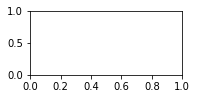

In [36]:
#分割3*2=6个子图，并在1号子图上作图
plt.subplot(3,2,1)

In [66]:
# 初始化原始数据点。
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.vstack((x1, x2)).T

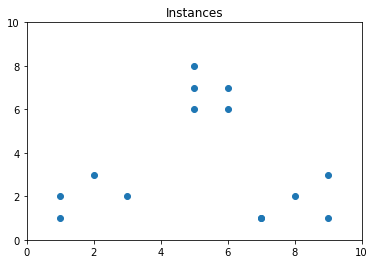

In [67]:
# 在1号子图做出原始数据点阵的分布。
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
clusters = [2, 3, 4, 5, 8]#聚类的类别数量 
subplot_counter = 1

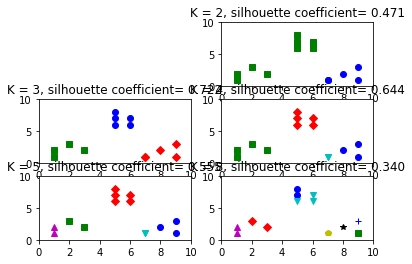

In [68]:
sc_scores = []
for t in clusters:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    sc_score = silhouette_score(X, kmeans_model.labels_, metric='euclidean')
    sc_scores.append(sc_score)
# 绘制轮廓系数与不同类簇数量的直观显示图。
    plt.title('K = %s, silhouette coefficient= %0.03f' %(t, sc_score))   

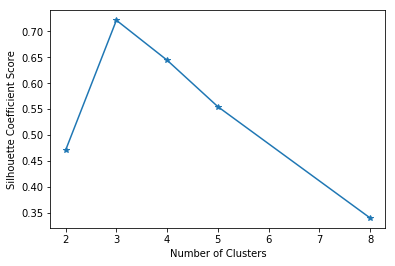

In [69]:
# 绘制轮廓系数与不同类簇数量的关系曲线。
plt.figure()
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')
plt.show()

k均值聚类简单实用，但是容易收敛到局部最优解，且需要预选设定初试簇的数量  
对于第一个问题，通常采用多次执行算法，选择挑选性能最好的初始点。  
对于第二个问题，可以采用‘肘部观察法’

### 利用肘部观察法选择k值

In [71]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

In [73]:
# 使用均匀分布函数随机三个簇，每个簇周围10个数据样本。
cluster1 = np.random.uniform(0.5, 1.5, (2, 10))
cluster2 = np.random.uniform(5.5, 6.5, (2, 10))
cluster3 = np.random.uniform(3.0, 4.0, (2, 10))

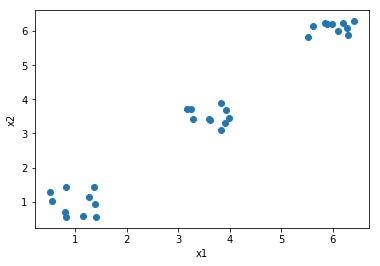

In [79]:
# 绘制30个数据样本的分布图像。
X = np.hstack((cluster1, cluster2, cluster3)).T
plt.scatter(X[:,0], X[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

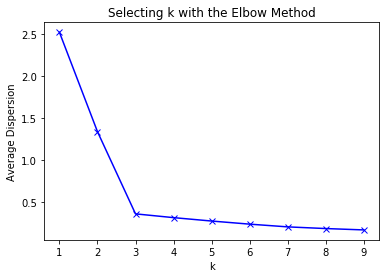

In [80]:
# 测试9种不同聚类中心数量下，每种情况的聚类质量，并作图。
K = range(1, 10)
meandistortions = []

for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])
    
plt.plot(K, meandistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

# 降维

## 主成分分析

对于特征空间做了映射，使得映射后的特征空间正交。  
对于相关系数矩阵或者标准化后的协方差矩阵，求特征值和特征向量

### 导入数据

In [263]:
#这里仍旧使用聚类所用的数据。
import pandas as pd
digits_train=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra',header=None)
digits_test=pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tes',header=None)
#这里数据集的列名为默认的数字，所以可以直接这样调用
X_train=digits_train[np.arange(64)]
y_train=digits_train[64]
X_test=digits_test[np.arange(64)]
y_test=digits_test[64]

### 训练模型

In [264]:
from sklearn.decomposition import PCA

In [265]:
#压缩特征至二维
est=PCA(n_components=2)
X_pca=est.fit_transform(X_train)

In [266]:
import matplotlib.pyplot as plt
import matplotlib as mpl
#绘制图像时允许中文
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [267]:
def plot_pca_scatter():
    colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']
    for i in range(len(colors)):
        px=X_pca[:,0][y_train==i]
        py=X_pca[:,1][y_train==i]
        plt.scatter(px,py,c=colors[i])
    plt.legend(np.arange(0,10).astype(str))
    plt.xlabel('第一主成分')
    plt.ylabel('第二主成分')
    plt.show()

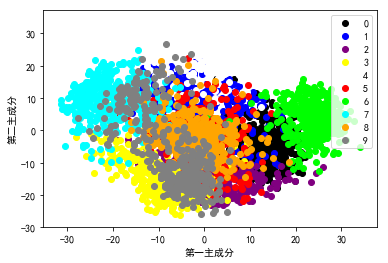

In [268]:
plot_pca_scatter()

### 比较PCA前和PCA后的结果

利用支持向量机

In [269]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train,y_train)
svc_predict=svc.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [270]:
print(svc_predict[2])
y_test[2]

2


2

In [271]:
#主成分
from sklearn.decomposition import PCA
est=PCA(n_components=20)
X_pca_train=est.fit_transform(X_train)
X_pca_test=est.transform(X_test)
#支持向量机
svc_pca=LinearSVC()
svc_pca.fit(X_pca_train,y_train)
svc_pca_predict=svc_pca.predict(X_pca_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


指标分析：

In [272]:
from sklearn.metrics import confusion_matrix,classification_report

In [283]:
print('没有PCA的支持向量机分类')
print('accuracy:',svc.score(X_test,y_test))
print(confusion_matrix(y_test,svc_predict))
print(classification_report(y_test,svc_predict,target_names=np.arange(0,10).astype(str)))

没有PCA的支持向量机分类
accuracy: 0.9282136894824707
[[174   0   0   0   0   2   0   0   0   2]
 [  0 174   0   0   0   1   0   0   0   7]
 [  0   3 173   1   0   0   0   0   0   0]
 [  1   1   1 167   0   4   0   1   1   7]
 [  0   2   0   0 175   0   0   1   1   2]
 [  0   0   1   2   0 176   1   0   0   2]
 [  0   1   0   0   2   0 177   0   1   0]
 [  0   0   0   0   2   8   0 163   0   6]
 [  1  27   0   3   0   3   0   0 123  17]
 [  1   3   0   3   4   2   0   1   0 166]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       178
           1       0.82      0.96      0.89       182
           2       0.99      0.98      0.98       177
           3       0.95      0.91      0.93       183
           4       0.96      0.97      0.96       181
           5       0.90      0.97      0.93       182
           6       0.99      0.98      0.99       181
           7       0.98      0.91      0.94       179
           8       0.98      0.71      

In [285]:
print('经过PCA后的支持向量机分类')
print('accuracy:',svc_pca.score(X_pca_test,y_test))
print(confusion_matrix(y_test,svc_pca_predict))
print(classification_report(y_test,svc_pca_predict,target_names=np.arange(0,10).astype(str)))

经过PCA后的支持向量机分类
accuracy: 0.9137451307735114
[[170   0   0   0   1   7   0   0   0   0]
 [  0 164   3   0   0   1   0   0   1  13]
 [  0   0 175   0   0   0   0   2   0   0]
 [  2   1   3 161   0   8   0   1   5   2]
 [  0  14   0   0 163   0   0   2   1   1]
 [  0   1   0   0   1 177   1   0   1   1]
 [  1   1   0   0   2   0 177   0   0   0]
 [  0   1   0   0   2  11   0 161   2   2]
 [  1  23   0   1   0   4   2   1 141   1]
 [  2   3   0   3   5   8   0   0   6 153]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       178
           1       0.79      0.90      0.84       182
           2       0.97      0.99      0.98       177
           3       0.98      0.88      0.93       183
           4       0.94      0.90      0.92       181
           5       0.82      0.97      0.89       182
           6       0.98      0.98      0.98       181
           7       0.96      0.90      0.93       179
           8       0.90      0.81     

主成分尽管会损失一些信息，但是降低了维度，减少了训练时间